In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
moon = np.load('big_moon270.npz')
time = moon['time']
volts = moon['volts']

<IPython.core.display.Javascript object>


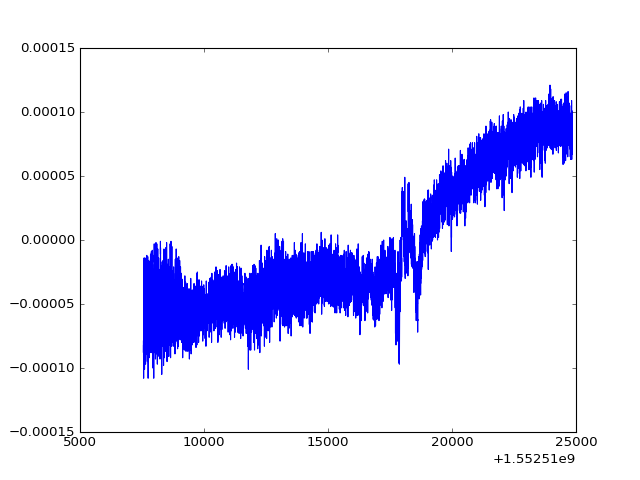

In [68]:
plt.plot(time, volts)
plt.show()

In [69]:
ftmoon = np.abs(np.fft.fft(volts))**2
freqs = np.fft.fftfreq(len(volts), 1)

<IPython.core.display.Javascript object>


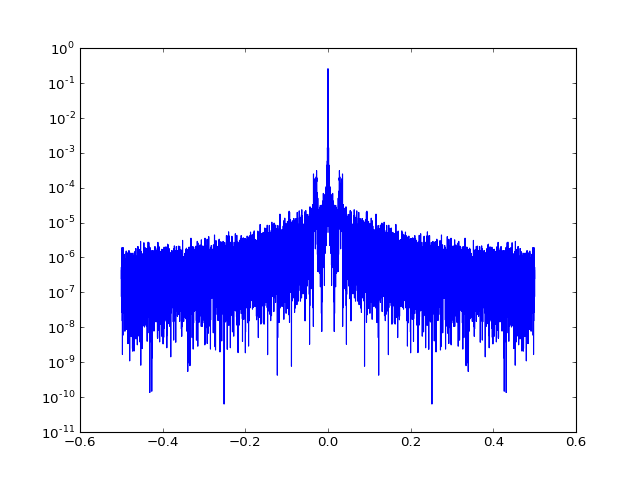

In [70]:
%matplotlib notebook
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ftmoon))
plt.show()

## Big Moon Data

In [66]:
moon = np.load('big_moonfinal.npz')
time = moon['time']
volts = moon['volts']

<IPython.core.display.Javascript object>


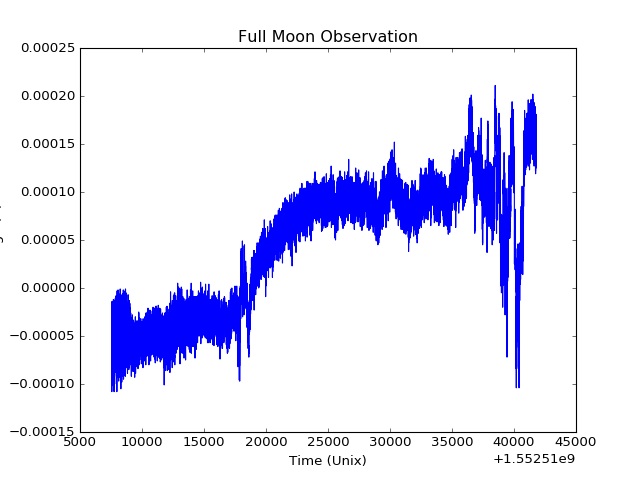

In [67]:
plt.plot(time, volts)
plt.xlabel('Time (Unix)')
plt.ylabel('Voltage (V)')
plt.title('Full Moon Observation')
plt.show()

In [68]:
moonvolts = np.fft.fft(volts)
ftmoon = np.abs(moonvolts)**2
freqs = np.fft.fftfreq(len(volts), 1)

<IPython.core.display.Javascript object>


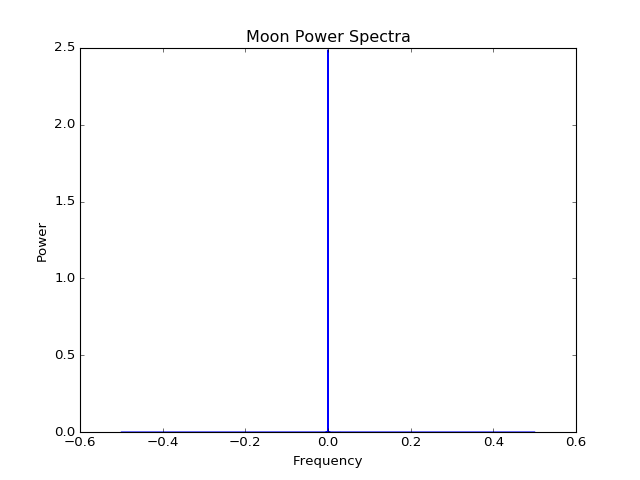

In [69]:
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ftmoon))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Moon Power Spectra')
plt.show()

### Filter out noise from moon voltages

In [97]:
moonvolts[np.where(np.abs(freqs) > 0.04)] = 0
moonvolts[np.where(np.abs(freqs) < 0.025)] = 0
ftmoon = np.abs(moonvolts)**2

### Plot the filtered Moon Power Spectra

<IPython.core.display.Javascript object>


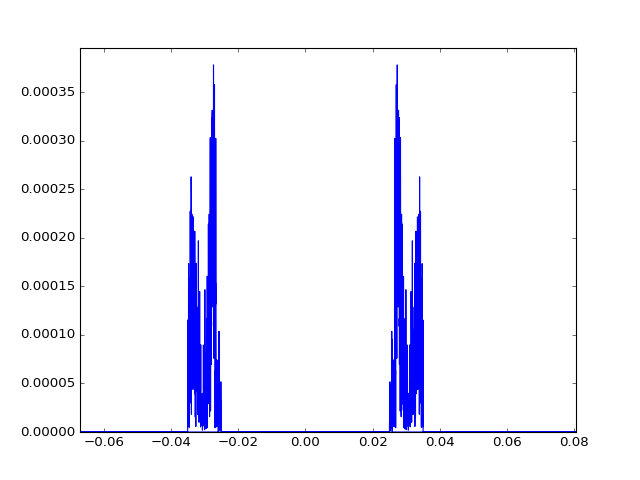

In [98]:
%matplotlib notebook
plt.plot(freqs, ftmoon)
plt.show()

### Inverse FT the filtered Voltage and Frequencies

In [94]:
invmoon = np.fft.ifft(moonvolts)

### Plot the Filtered times and Moon Voltages

<IPython.core.display.Javascript object>


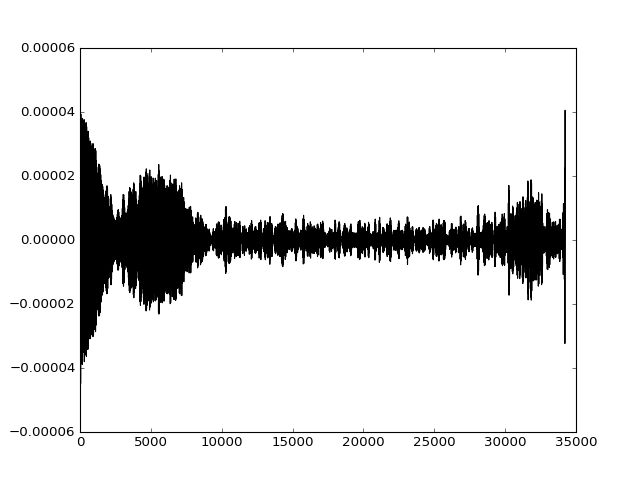

In [99]:
plt.plot(time-time[0], invmoon, 'k-')
plt.show()

In [78]:
np.where(invmoon == 0)

(array([], dtype=int64),)

In [74]:
finalmoon = np.fft.fft(invmoon)
ffreqs = np.fft.fft(ftimes)

<IPython.core.display.Javascript object>


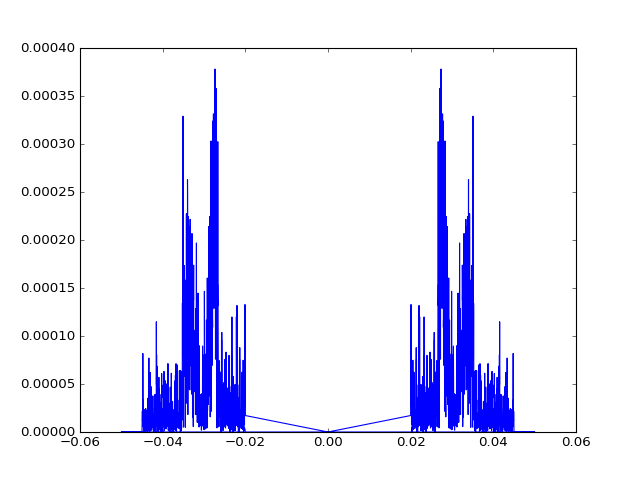

In [75]:
plt.plot(ffreqs, np.abs(finalmoon)**2)
plt.show()